# Predicting the Stock Price of GOOGLE using Recurrent Neural Networks

Importing the basic libraries required for Data Preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the Training Dataset

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
training_set[:7,]

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       [ 328.34],
       [ 322.04],
       [ 313.7 ],
       [ 310.59]])

Feature Scaling - Performing Normalization where all the values will be compressed between 0 and 1

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled[:7,]

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       [ 0.09156187],
       [ 0.07984225],
       [ 0.0643277 ],
       [ 0.0585423 ]])

Creating a data structure with 60 time steps and 1 output

In [8]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

Creating Numpy array which is later used to feed the Recurrent Neural Network

In [9]:
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping the Training set array to increase its dimensionality

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Building the Recurrent Neural Network (Stacked Long Short Term Memory with some Dropout Regularization )

Importing the Libraries

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


Initializing the RNN

In [12]:
regressor = Sequential()

Adding the First LSTM Layer and some Dropout Regularization to avoid over fitting

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Adding a second LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding a third LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding a fourth LSTM layer and some Dropout regularisation

In [16]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Adding the output layer

In [17]:
regressor.add(Dense(units = 1))

Compiling the Recurrent Neural Network

In [18]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Fitting the Recurrent Neural Network to the Training set

In [27]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0040
Epoch 2/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0041
Epoch 3/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0041
Epoch 4/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0037
Epoch 5/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0038
Epoch 6/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0039
Epoch 7/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0040
Epoch 8/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0035
Epoch 9/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0034
Epoch 10/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0033
Epoch 11/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0034
Epoch 12/100
1198/1198 [==============================] - 11s 9ms/ste

Making the Predictions and Visualizing the Results

Importing the real stock price of 2017

In [28]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [29]:
real_stock_price[:7,]

array([[ 778.81],
       [ 788.36],
       [ 786.08],
       [ 795.26],
       [ 806.4 ],
       [ 807.86],
       [ 805.  ]])

Getting the predicted stock price of 2017 using the regressor built above

In [30]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [31]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [32]:
predicted_stock_price[:7]

array([[ 777.69555664],
       [ 774.83691406],
       [ 776.55560303],
       [ 778.23071289],
       [ 781.95910645],
       [ 788.49645996],
       [ 793.18377686]], dtype=float32)

Visualising the results

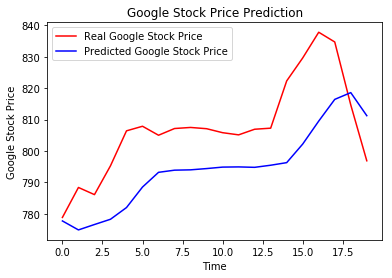

In [33]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Calculating the Root Mean Square Error as the metric

In [34]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

16.575975074088205